# Dependencies

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import sqlalchemy

In [2]:
# Reflect Tables into SQL Alchemy ORM
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import extract

# Declarations

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")
# reflect existing datebase into model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
# View all classes detected by automap
Base.classes.keys()

['measurement', 'station']

In [4]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station
# Create session (link)
session = Session(engine)
# Starting date
prev_year = dt.date(1000, 1, 1) # Even though the first date in data set is actually 2010

# Precipitation Data

In [5]:
# Perform a query to retrieve the data and precipitation scores
results_june = []
results_december = []
results_june = session.query(Measurement.date, Measurement.prcp)
results_december = session.query(Measurement.date, Measurement.prcp)

results_june = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).filter(extract('month', Measurement.date)==6).all()
results_december = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).filter(extract('month', Measurement.date)==12).all()
df_june = pd.DataFrame(results_june, columns=['date','precipitation'])
df_december = pd.DataFrame(results_december, columns=['date','precipitation'])
# Sort the dataframe by date
df_june.set_index(df_june['date'], inplace=True)
df_december.set_index(df_december['date'], inplace=True)
print(df_june.to_string(index=False))
print(df_december.to_string(index=False))
df_june = df_june.sort_index()
df_december = df_december.sort_index()


       date  precipitation
 2010-06-01           0.00
 2010-06-02           0.01
 2010-06-03           0.00
 2010-06-04           0.00
 2010-06-05           0.00
 2010-06-06           0.00
 2010-06-07           0.00
 2010-06-08           0.00
 2010-06-09           0.00
 2010-06-10           0.00
 2010-06-11           0.00
 2010-06-12           0.00
 2010-06-13           0.00
 2010-06-14           0.00
 2010-06-15           0.00
 2010-06-16           0.00
 2010-06-17           0.00
 2010-06-18           0.00
 2010-06-19           0.00
 2010-06-20           0.00
 2010-06-21           0.00
 2010-06-22           0.00
 2010-06-23           0.00
 2010-06-24           0.00
 2010-06-25           0.00
 2010-06-26           0.02
 2010-06-27           0.00
 2010-06-28           0.00
 2010-06-29           0.00
 2010-06-30           0.00
 2011-06-01           0.07
 2011-06-02           0.00
 2011-06-03           0.56
 2011-06-04           0.89
 2011-06-05           0.00
 2011-06-06           0.00
 

In [6]:
df_june.describe()

,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [7]:
df_december.describe()

,precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


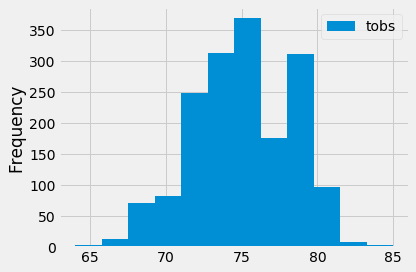

In [19]:

# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
session.query(Measurement.tobs)

results_june = session.query(Measurement.tobs).\
filter(Measurement.date >= prev_year).filter(extract('month', Measurement.date)==6).all()

results_december = session.query(Measurement.tobs).\
filter(Measurement.date >= prev_year).filter(extract('month', Measurement.date)==12).all()
#print(results)
df_june = pd.DataFrame(results_june, columns=['tobs'])
df_june

df_december = pd.DataFrame(results_december, columns=['tobs'])
df_december

# June Temperature (across all stations & years)
df_june.plot.hist(bins=12)
plt.tight_layout()


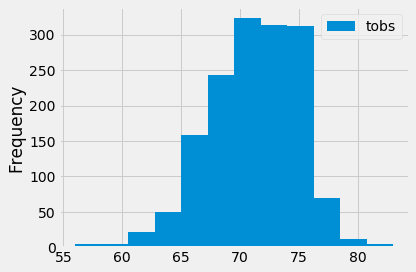

In [20]:
# December Temperature (across all stations & years)
df_december.plot.hist(bins=12)
plt.tight_layout()

In [21]:
df_june.describe()

,tobs
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [22]:
df_december.describe()

,tobs
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000
